# ROC Curve

The receiver operating characteristic (ROC) curve is metric similar to the precision-recall curve. It plots the true positive rate (recall) versus the false negative rate (FPR, also called fall-out). The FPR is obtained by:

$FPR = \frac{FP}{FP+TN}$

The ROC curve can be plotted by:

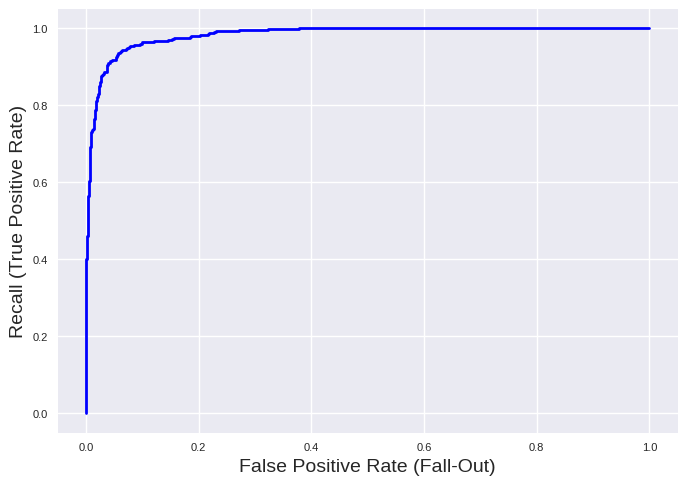

In [1]:
# code of a previous notebook of this section
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
import numpy as np
from sklearn.svm import SVC

data = pd.read_csv('cl1_data.csv')

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

y_train = train_set['label']
X_train = train_set.drop(['label'], axis=1)

num_pipeline = make_pipeline(StandardScaler()) 

preprocessing = ColumnTransformer([("num",num_pipeline, make_column_selector(dtype_include=np.number))])

model_svc = make_pipeline(preprocessing, SVC(kernel='rbf', C=1.0)) 
model_svc.fit(X_train, y_train)

y_scores_svc = cross_val_predict(model_svc, X_train, y_train, cv=5, method="decision_function")

# end of code from a previous notebook of this section

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_svc, tpr_svc, decision_func_svc = roc_curve(y_train, y_scores_svc, pos_label='group2')

plt.style.use('seaborn-v0_8')

plt.plot(fpr_svc, tpr_svc, "b", linewidth=2)

plt.xlabel("False Positive Rate (Fall-Out)", fontsize=14)
plt.ylabel("Recall (True Positive Rate)", fontsize=14)
plt.tick_params(labelsize=8)

plt.show()

Similar as for precision and recall, we see a trade-off between recall and FPR. Furthermore, a ROC curve on the top left corner indicates a good model which is the case for our example. We can get the area under this curve as a scoring function:  

In [2]:
from sklearn.metrics import roc_auc_score

print('Integrated ROC: %0.3f' % (roc_auc_score(y_train, y_scores_svc)))

Integrated ROC: 0.983


You should prefer the precision-recall curve for imbalanced classes (as in our example) or when you care more about false positives than false negatives. Otherwise, the ROC curve is the better choice.